```
Generative AI with Python, by Fernando Amaral
```

## Setup

In [ ]:
!pip install transformers

In [ ]:
import transformers
from transformers import pipeline

## Diagram


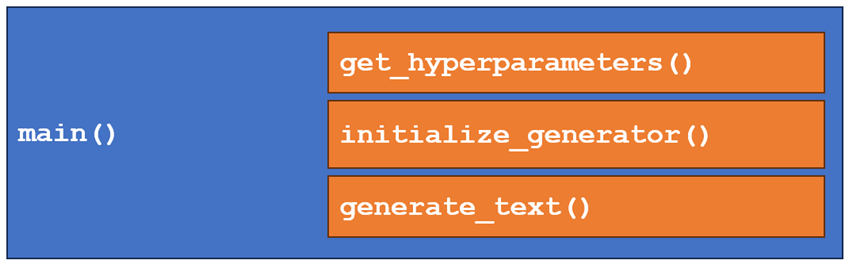

## Code

In [18]:
def get_hyperparameters():
    max_length = int(input("Max length [60]: ") or "60")
    do_sample = input("Do sample [True]: ") in ["True", "true", "1", ""]
    temperature = float(input("Temperature [0.7]: ") or "0.7")
    top_k = int(input("Top K [50]: ") or "50")
    top_p = float(input("Top P [0.85]: ") or "0.85")
    repetition_penalty = float(input("Repetition Penalty [1.0]: ") or "1.0")
    length_penalty = float(input("Length Penalty [1.0]: ") or "1.0")
    num_return_sequences = int(input("Number of return sequences [1]: ") or "1")
    early_stopping = input("Early stopping [False]: ") in ["True", "true", "1"]
    pad_token_id = int(input("Pad token ID [50256]: ") or "50256")

    return (max_length, do_sample, temperature, top_k, top_p, repetition_penalty,
            length_penalty, num_return_sequences, early_stopping, pad_token_id)

In [19]:
def initialize_generator(model_name="gpt2-medium"):
    try:
        generator = pipeline("text-generation", model=model_name)
        return generator
    except Exception as e:
        print(f"Error on initialization: {e}")
        return None

In [20]:
def generate_text(generator, prompt, max_length, do_sample, temperature, top_k,
                  top_p, repetition_penalty, length_penalty, num_return_sequences,
                  early_stopping, pad_token_id):
    try:
        result = generator(prompt,
                            max_length=max_length,
                            do_sample=do_sample,
                            temperature=temperature,
                            top_k=top_k,
                            top_p=top_p,
                            repetition_penalty=repetition_penalty,
                            length_penalty=length_penalty,
                            num_return_sequences=num_return_sequences,
                            early_stopping=early_stopping,
                            pad_token_id=pad_token_id)
        return result
    except Exception as e:
        print(f"Error on text generation: {e}")
        return None

In [24]:
def main():
    prompt = input("Enter your prompt: ")

    adjust_hyperparams = input("Do you want to adjust any Hyper Parameter? [n]: ").lower() in ["y", "yes"]

    if adjust_hyperparams:
        hyperparams = get_hyperparameters()
    else:
        hyperparams = (60, True, 0.7, 50, 0.85, 1.0, 1.0, 1, False, 50256)

    generator = initialize_generator("gpt2-medium")
    results = generate_text(generator, prompt, *hyperparams)

    return results

## Execution

In [25]:
results = main()
for i, result in enumerate(results):
  print(f"\nResult {i + 1}:\n{result['generated_text']}")

Enter your prompt: hello say some thing
Do you want to adjust any Hyper Parameter? [n]: y
Max length [60]: 60
Do sample [True]: 
Temperature [0.7]: 
Top K [50]: 
Top P [0.85]: 
Repetition Penalty [1.0]: 
Length Penalty [1.0]: 
Number of return sequences [1]: 3
Early stopping [False]: 
Pad token ID [50256]: 


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.



Result 1:
hello say some thing about a girl with a baby and a beard and a hair that's a bit longer than her legs and a man who's got a beard and a hair that's a bit longer than his legs and a woman who's got a baby and a beard and a hair that's a

Result 2:
hello say some thing about "a good day's work" and that's the way to describe it. It's not like they're going to be sitting there at their desk and doing nothing. I think that's the way I've always described it, and that's the way I'm going to

Result 3:
hello say some thing to me. I think of you. I think of you in my dreams. I think of you in my nightmares. I think of you when I sleep. I think of you when I wake up. I think of you when I'm dead. I think of you when I
